In [99]:
import pandas as pd
df = pd.read_csv("edlich-kmeans-A0.csv")

In [100]:
df.head()

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216


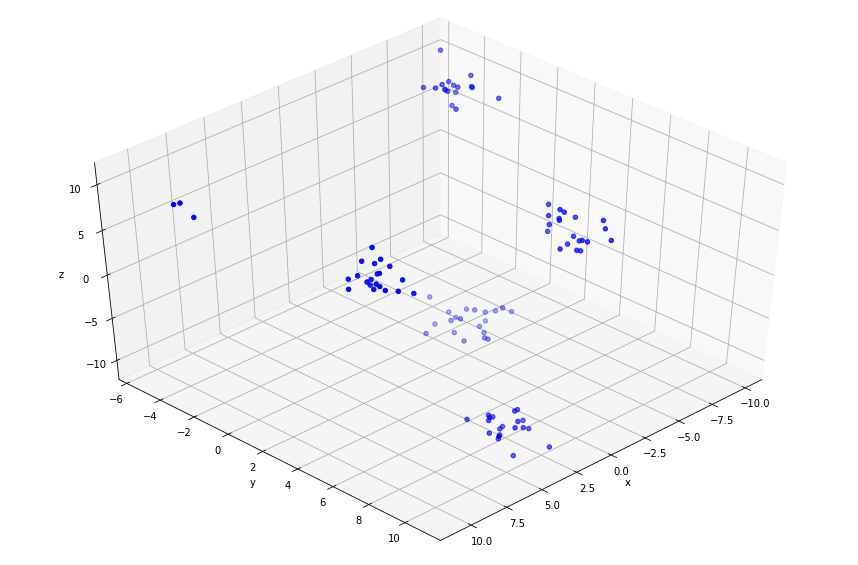

In [101]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], c='b', marker='o')
ax.view_init(45, 45)
plt.show()

# A) What is the best k?

     k                                             kmeans       inertia
0    1  KMeans(algorithm='auto', copy_x=True, init='k-...  10260.706785
1    2  KMeans(algorithm='auto', copy_x=True, init='k-...   4899.629957
2    3  KMeans(algorithm='auto', copy_x=True, init='k-...   2409.509879
3    4  KMeans(algorithm='auto', copy_x=True, init='k-...   1278.182057
4    5  KMeans(algorithm='auto', copy_x=True, init='k-...    441.623289
5    6  KMeans(algorithm='auto', copy_x=True, init='k-...    213.750353
6    7  KMeans(algorithm='auto', copy_x=True, init='k-...    193.702737
7    8  KMeans(algorithm='auto', copy_x=True, init='k-...    175.507892
8    9  KMeans(algorithm='auto', copy_x=True, init='k-...    159.457178
9   10  KMeans(algorithm='auto', copy_x=True, init='k-...    149.600447
10  11  KMeans(algorithm='auto', copy_x=True, init='k-...    141.911622
11  12  KMeans(algorithm='auto', copy_x=True, init='k-...    131.630446
12  13  KMeans(algorithm='auto', copy_x=True, init='k-...    121

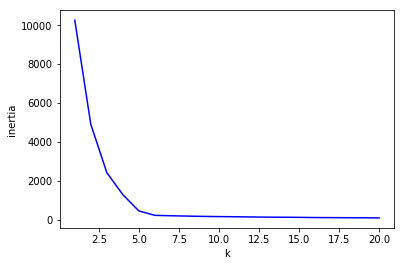

In [102]:
from sklearn.cluster import KMeans

kdf = pd.DataFrame({"k": range(1,21)})
kdf["kmeans"] = kdf.apply( lambda row: KMeans(n_clusters=row["k"], random_state=0).fit(df.values), axis=1)

# sum of squared distances (samples to closest cluster center)
kdf["inertia"] = kdf.apply( lambda row: row["kmeans"].inertia_, axis=1)

print(kdf)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('k')
ax.set_ylabel('inertia')

ax.plot(kdf["k"], kdf["inertia"], 'b')
plt.show()

# B) Can you print the clustering vector?

Cluster center-coordinates:
           x         y         z
0   3.665368  8.910750 -9.065798
1  -8.532420 -3.554015  8.968577
2   5.882405  3.590739  4.605080
3  -2.403317  2.147529 -8.023789
4  -5.106915  5.601798  3.719569
5  10.399197 -3.204062  9.163650


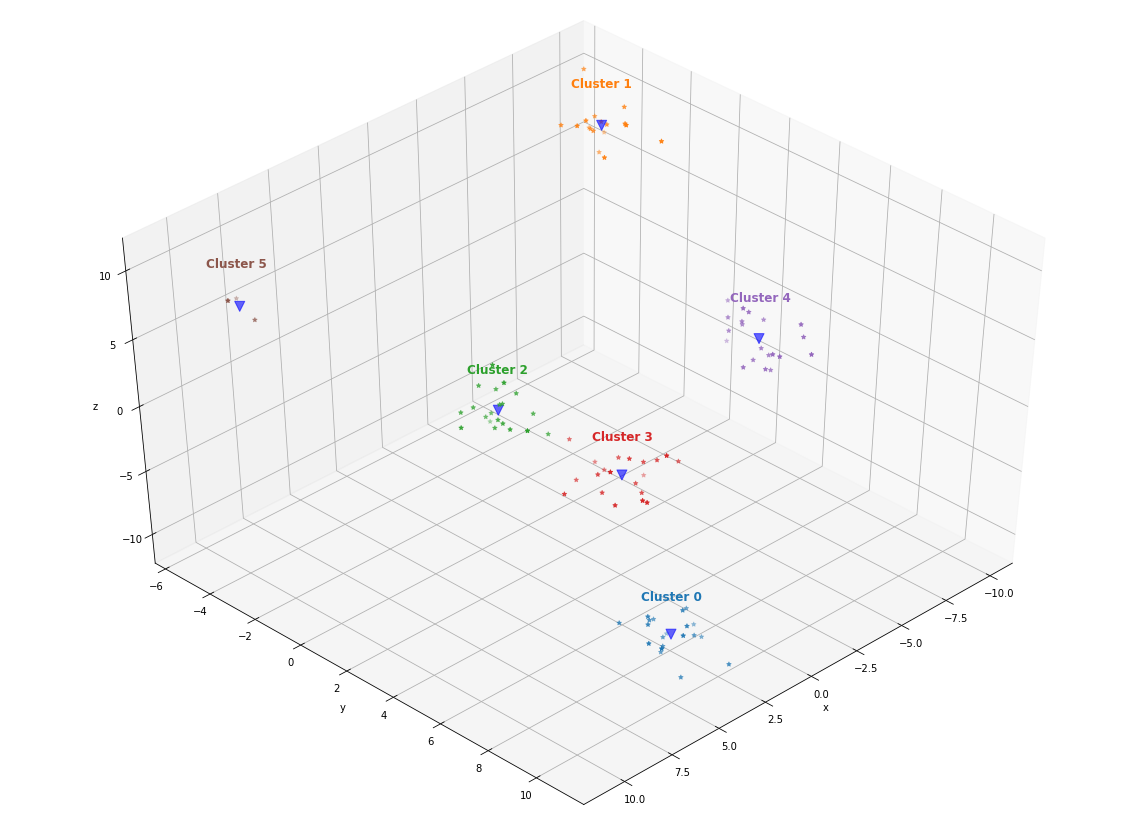

In [114]:
#from solution above I choose 5 as the best value of K
k = 6
rangecluster = range(0,k)
kmeans = kdf["kmeans"][k-1]

# dataframe of cluster centers
cluster_centers = pd.DataFrame( kmeans.cluster_centers_, columns=["x", "y", "z"] )

print("Cluster center-coordinates:")
print(cluster_centers)

# setup plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# plot center points
ax.scatter(bkdf.iloc[:,0], bkdf.iloc[:,1], bkdf.iloc[:,2], c='b', marker='v', alpha=0.6, s=100)

# retrieve default colormap
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# plot by cluster (each time different color)
for cluster in rangecluster:
    c_colors = df.loc[df["cluster"] == cluster]
    
    # plot
    ax.scatter(c_colors.iloc[:,0], c_colors.iloc[:,1], c_colors.iloc[:,2], c=colors[cluster], marker='*')
    
    # labels
    ax.text(bkdf.iloc[cluster,0], bkdf.iloc[cluster,1], bkdf.iloc[cluster,2]+3, "Cluster {}".format(cluster), None, va='center', ha='center', color=colors[cluster], weight='bold', size='larger')

ax.view_init(45, 45) 

plt.show()